In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Loading all files of ratings
d1=pd.read_csv('1.csv')
d2=pd.read_csv('2.csv')
d3=pd.read_csv('3.csv')
d4=pd.read_csv('4.csv')
d5=pd.read_csv('5.csv')
d6=pd.read_csv('6.csv')
d7=pd.read_csv('7.csv')
d8=pd.read_csv('8.csv')
dc=pd.concat([d1,d2,d3,d4,d5,d6,d7,d8]) #Ratings union dataset

In [3]:
dc #All ratings exploratory

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500
...,...,...,...,...
1499995,124380,4.5,1196786159,ns5272
1499996,124380,2.5,1196786030,ns5492
1499997,124380,3.5,1196785679,hs305
1499998,124380,4.5,1196787089,ns7881


## Generating rating_globals.csv

In [4]:
#Dataset for GET_SCORE_COUNT
ds=dc #Ratings union dataset
ds=ds.drop(['userId'], axis=1) #Dropping userId
ds['timestamp']=ds['timestamp'].apply(lambda x: datetime.fromtimestamp(x)) #Convertion timestamp --> datetime
ds['year']=ds['timestamp'].apply(lambda x: x.year) #Extract year another new field
ds=ds.drop(['timestamp'], axis=1) #Dropping timestamp
ds = ds.groupby(['movieId', 'year'])['rating'].mean().reset_index() #Grouping and calculate mean score
ds.to_csv('rating_global.csv') #CSV generate

In [10]:
ds

,movieId,year,rating
0,as1,1996,3.291667
1,as1,1997,3.000000
2,as1,1998,4.166667
3,as1,1999,3.863636
4,as1,2000,3.904762
...,...,...,...
505904,ns999,2013,3.750000
505905,ns999,2014,3.714286
505906,ns999,2015,3.700000
505907,ns999,2016,3.650000


## Rating promedio/año de cada película

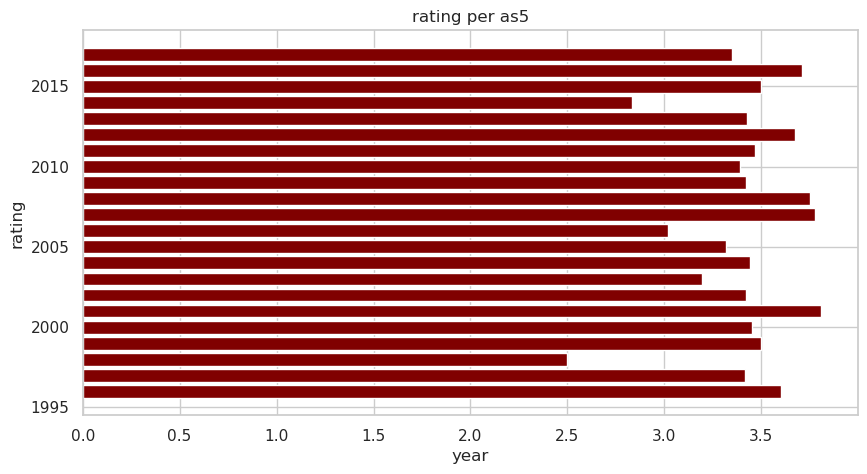

In [28]:
#sns.set_theme(style="whitegrid")
movie_Id='as5'
fig = plt.figure(figsize=(10, 5))

df=ds[ds['movieId']==movie_Id]
# creating the bar plot
plt.barh(df['year'], df['rating'], color='maroon')

plt.xlabel("year")
plt.ylabel("rating")
plt.title("rating per {0}".format(movie_Id))
plt.show()

## Generating recsys.csv

In [29]:
#Dataset for GET_RECOMMENDATIONS
dd=dc #Ratings union dataset
dd=dd.drop(['userId', 'timestamp'], axis=1) #Dropping userId and timestamp
dd = dd.groupby(['movieId'])['rating'].mean().reset_index() #Agrupando por id y obteniendo su rating promedio
dd.to_csv('recsys.csv') #CSV generate

In [33]:
dd

,movieId,rating
0,as1,3.467131
1,as10,3.439571
2,as100,3.609302
3,as1000,3.556701
4,as1001,3.585288
...,...,...
22993,ns995,3.515625
22994,ns996,3.626518
22995,ns997,3.530526
22996,ns998,3.582645


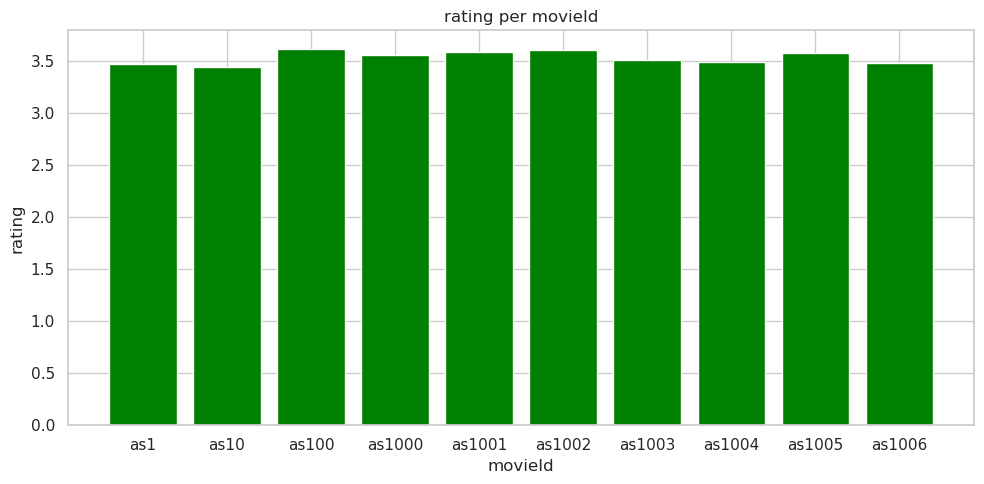

In [36]:
df=dd.head(10)
# creating the bar plot
fig = plt.figure(figsize=(10, 5))
plt.bar(df['movieId'], df['rating'], color='green')

plt.xlabel("movieId")
plt.ylabel("rating")
plt.title("rating per movieId")
plt.show()

### Conclusión: Promediar los ratings reduce la dimensionalidad de los 11M de registros y permite obtener un dataframe base mas 'limpio' para la generación del modelo de recomendación.